# Simulating Galaxy Observations: Photometry

Last week in the **Introduction to Python** series, Luke went into the general structure/idea of Python, including some syntax, basic I/O, structures, etc. 

This week, I want to build on that by trying to get everyone comfortable **hacking at packages/methods without much experience**. Although Python has an enormous number of packages available that can do a lot of high-level tasks, I want to focus this week on a few core packages: `matplotlib` (the default plotting utility), `numpy` (useful for fast operations with a lot of numbers), and `scipy` (useful for a lot of built-in methods).

We will use these packages this week to do some basic science: simulating a galaxy observation. This will have two components: simulating a photometric observation (the intensity of light as a function of wavelength) and, if time permits, simulating a spectroscopic observation (the intensity of light as a function of position and wavelength).

In [1]:
# only necessary if you're running Python 2.7 or lower
from __future__ import print_function
from __builtin__ import range

# Plotting

Before we get started, we need to initialize the environment. First, let's import `pyplot` from `matplotlib`, which we will use to plot things. Then, we can use one of the "magic commands" to enable *in-line plotting*, which ensures our plots will show up in our actual notebook (rather than externally).

In [2]:
# import plotting utility and define our naming alias
from matplotlib import pyplot as plt

# plot figures within the notebook rather than externally
%matplotlib inline

Let's make some quick plots to see how things look using some fake data. We will use `numpy` to help us with this. 

In [3]:
# import numpy
import numpy as np

Let's quickly generate some data. We'll start with a "grid" of points $\mathbf{x}$ and compute the corresponding output $\mathbf{y}$.

In [4]:
# define a relationship: y = ax + b
a, b = 1., 0.  # the trailing decimal guarantees this is a "float" rather than "int"

# initialize our data
n = 1000  # number of data points
x = np.linspace(0., 100., n)  # our grid of `n` data points from 0. to 100.
y = a * x + b  # our output y

Now let's add some noise to our results using `numpy`'s built-in `random` module.

In [5]:
# add in noise drawn from a normal distribution
ye = np.random.normal(loc=0., scale=5., size=n)  # jitter
yobs = y + ye  # observed result

Let's see how our results look.

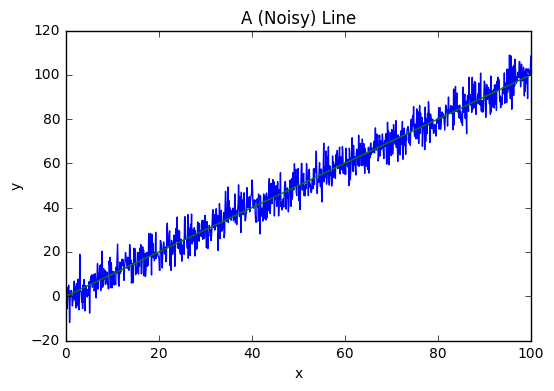

In [6]:
# plot our results
plt.plot(x, yobs)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('A (Noisy) Line')

Play around with the parameters above to get some more familiarity with plotting. If you have time, see if you can:
- Change the original relationship to a quadratic one.
- Change the type of random noise we are adding to the data.
- Change the colors used for plotting.
- Change the "linestyle" used for plotting from connected lines to unconnected dots.
- Change the x and y limits in the plot.
and any other changes you'd like to experiment with.

Feel free to use any resources you want to figure this out. For immediate results, try the `help` function (shown below) or **Shift-Tab** within a function. Googling is also perfectly legit: pretty much everyone who codes has a lot of "how to do X python"-style searches in their search history (I know I do). There's also some official documentation [online](https://matplotlib.org/faq/usage_faq.html).

In [7]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi

I always find the default label and axes markers to be too small to easily read (especially when showing people plots). Luckily, it's pretty straightforward to change the plotting defaults for `matplotlib` to make things easier to read. We can override the defaults whenever we plot something (which we'll get to in a bit) or we can just update them all at once (as below).

In [8]:
#from matplotlib import rcParams

# re-defining plotting defaults
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '7.5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '3.5'})
rcParams.update({'xtick.minor.width': '1.0'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '7.5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '3.5'})
rcParams.update({'ytick.minor.width': '1.0'})
rcParams.update({'xtick.color': 'k'})
rcParams.update({'ytick.color': 'k'})
rcParams.update({'font.size': 30})

NameError: name 'rcParams' is not defined

The set of commands above probably didn't work on the first try. What gives? Looking at the error, it's telling us that the name `'rcParams'` is not defined in any capacity. This makes some sense: we never defined this variable anywhere. Try uncommenting the first line and see if it works a second time (hopefully it should).

Let's re-plot our results to see what updating our defaults has changed.

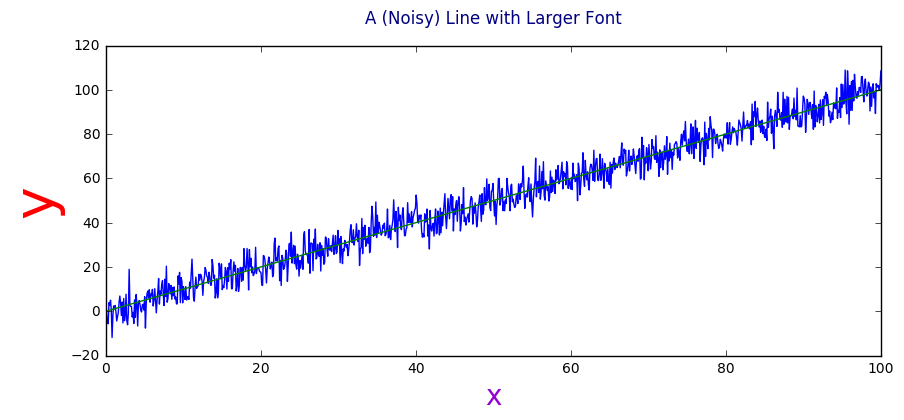

In [9]:
# plot our results
plt.figure(figsize=(10, 4))
plt.plot(x, yobs)
plt.plot(x, y)
plt.xlabel('x', fontsize=20, color='darkviolet')
plt.ylabel('y', fontsize=40, color='red')
plt.title('A (Noisy) Line with Larger Font', y=1.05, color='navy')

Now that we've changed the defaults, we notice a number of issues with our plot to do with our font size. This is because all outputs from `pyplot` are intrinsically drawn on a `Figure` object. If one of these are not initialized explicitly at the beginning, a default one is created. With our new larger fonts, the default figure feels a little squished. 

Play around with changing the size of our figure using the commented line. Feel free to also mess around with the arguments passed to the axes labels and titles.

# Galaxies and Emission Lines

Now that we have some familiarity with plotting, let's move on to a bit more of the science. In the `seds/` folder, there are a bunch of files containing galaxy **spectral energy distributions** (SEDs). Let's load in [UGCA 166](https://en.wikipedia.org/wiki/I_Zwicky_18), a nearby blue compact dwarf galaxy that's actively forming stars.

In [10]:
data = np.loadtxt('seds/brown_UGCA_166_spec.dat')
data

array([[  1.02070000e+02,   7.77978839e-01],
       [  1.03970000e+02,   8.49130251e-01],
       [  1.05900000e+02,   9.33198655e-01],
       ..., 
       [  3.45592570e+05,   4.66853349e-02],
       [  3.47281960e+05,   6.07124002e-02],
       [  3.48971200e+05,   5.57716827e-02]])

The data we loaded in is a $N \times 2$-dimensional **`numpy` array**, where the first column is the wavelength (measured in **Angstroms**, $10^{-10}$ meters) while the second column is the relative **flux density** (energy per time per area per wavelength, i.e. the relative **intensity** of the light at that particular wavelength).

Arrays are fixed-size data structures in Python that allow you to quickly manipulate lots of numbers. We'll be exploiting them here and you'll definitely be using them if you code in Python more regularly.

The way `data` is currently structured is a bit awkward: the relevant quantities are the columns here, which makes plotting a bit awkward. One possible way to get around this is to make some new variables by (1) iterating through the array (using an *implicit* `for` loop) or (2) **slicing** through the array. Both of these are deomnstrated below.

In [11]:
# iteration through the array using an implicit for loop
print('Wavelength:', np.array([d[0] for d in data]))

# slice the array along the 0th entry in the 1st dimension (i.e. by column, not row)
print('Wavelength:', data[:, 0])

Wavelength: [  1.02070000e+02   1.03970000e+02   1.05900000e+02 ...,   3.45592570e+05
   3.47281960e+05   3.48971200e+05]
Wavelength: [  1.02070000e+02   1.03970000e+02   1.05900000e+02 ...,   3.45592570e+05
   3.47281960e+05   3.48971200e+05]


To facilitate plotting and later manipulation, let's redefine our data to instead be 2 $N$-dimensional arrays called `wave` and `fgal_wave`. There are a bunch of ways to do this besides the two shown above, but the most direct way is to use `numpy`'s built-in **array manipulation** functions.

**Extra challenge: can you code up your own custom method to do this? How many lines of code does your method take compared with the one line implementations shown above?**

In [12]:
# take the transpose of the array (N x M) -> (M x N)
print(data.T)
wave, fgal_wave = data.T

[[  1.02070000e+02   1.03970000e+02   1.05900000e+02 ...,   3.45592570e+05
    3.47281960e+05   3.48971200e+05]
 [  7.77978839e-01   8.49130251e-01   9.33198655e-01 ...,   4.66853349e-02
    6.07124002e-02   5.57716827e-02]]


Let's now plot the data to see what our galaxy looks like. Build on the bare-bones example below using the skills you've learned to make a better-looking plot. (At the minimum, please label the axes!)

In [13]:
# flux density (per wavelength) vs wavelength (angstroms) for UGCA 166
#plt.plot(wave, fgal_wave)
#plt.semilogx(wave, fgal_wave)
#plt.semilogy(wave, fgal_wave)
#plt.loglog(wave, fgal_wave)

Looking closely, we see that there are a number of very visible "spikes" on the plot. These are particular **emission lines** associated with atomic transitions. These specific **spectral features** are a direct result of the energetic photons emitted from all the new/young stars in the galaxy. Try and zoom in on the particular region on the plot where most of these are located. Can you identify any lines in particular based on [this list](http://classic.sdss.org/dr6/algorithms/linestable.html)? Some of the most common ones are also defined below.

**Extra challenge: Overplot the line wavelengths on the galaxy spectrum using the `plt.vlines` function.**

In [14]:
# defining some common emission lines
ha = 6564.6 # H-alpha [A]
n2 = 6549.86 # NII [A]
o3_1 = 5008.240 # OIII doublet (1) [A]
o3_2 = 4960.295 # OIII doublet (2) [A]
hb = 4862.7 # H-beta [A]
o2 = 3728.4 # approximate center of (blended) OII doublet [A]

# consolidating results in an array (in order of decreasing wavelength)
emlines = np.array([ha, n2, o3_1, o3_2, hb, o2])
emline_names = np.array(['Ha', 'NII', 'OIII (1)', 'OIII (2)', 'Hb', 'OII (1,2)'])
Nlines = len(emlines)

Before moving on, feel free to load in a few different galaxy spectra from the `seds/` folder (the `brown_` ones are particularly nice examples) to see how different galaxy spectra look.

# Filter Transmission Curves

Getting spectra of a galaxy is actually quite expensive and time-consuming. Instead, many large upcoming surveys such as [*Euclid*](https://www.euclid-ec.org/) will be **photometric** surveys. This just means that instead of observing galaxies as a *function of* wavelength, they simply count how many (relative) photons they receive in a specific wavelength interval. In other words, they take pictures of the sky in a particular wavelength range!

UGCA 166 is kinda bizarre within our local neighborhood, but is probably a good example of what galaxies are like at higher [redshifts](https://en.wikipedia.org/wiki/Redshift) (i.e. earlier times). We would like to simulate what our galaxy would look like in the photometric **filters** that will be part of the *Euclid* and [LSST](https://www.lsst.org/) surveys.

First we need to extract the relevant **filter transmission curves**, which tell us how much light is ultimately transmitted through the filter at a particular wavelength. I've stored these in the `filters/` folder, so we need to extract them now.

In [15]:
filt_path='./filters/' # file path for the filters folder

Our previous galaxy file was just a bunch of numbers, which we were able to load in using `np.loadtxt`. Our list of filters, however, is a bunch of names. This means we need to read in the file a bit differently. Let's do this line by line just to be very explicit about it.

In [16]:
# initialize lists
filt_names = []  # empty list
filt_files = []  # empty list

# read in our filter names and file paths line-by-line
filt_list = open(filt_path+'Euclid.list') # open list of filter files for Euclid+LSST
for line in filt_list:
    l = line.strip()  # strip out the end-carriage '\n' if present
    ls = l.split()  # split the line into component strings
    filt_names.append(ls[0]) # filter name
    filt_files.append(ls[1]) # filter file
filt_list.close()  # close file (**ALWAYS REMEMBER TO DO THIS**)
Nfilt = len(filt_files)  # number of filters

Play around with the components above to get a sense of what we just did. What happens if you remove parts or don't close the file? What operations can you do with lists? How about with arrays? Some quick examples are below. We'll be coming back to some of these subtleties later, but please don't hesitate to ask if you have any questions.

In [17]:
#print(filt_names, filt_names * 2)
#print(emlines, emlines * 2)
#print(filt_list)

Now let's load in our individual filters.

In [18]:
# initialize our lists
fw = []  # wavelengths 
fnu = []  # frequencies
ft = []  # transmission
c = 2.998e18  # speed of light [A/s]
for filt in filt_files:
    fpath = filt_path + filt  # append filter name to filter path
    temp = np.loadtxt(fpath)  # load ASCII text file (wavelength, transmission)
    fw.append(temp[:, 0])  # wavelength ('lambda') [A]
    fnu.append(c / temp[:, 0])  # frequency ('nu') [Hz]
    ft.append(temp[:, 1])  # transmission (fraction from 0. to 1.)

Try plotting some of these below building off of the basic layout. The basic `Figure` setup has been initialized along with two possible color schemes and a bunch of keyword arguments to the methods. Try to play around with the styles to see how they change things.

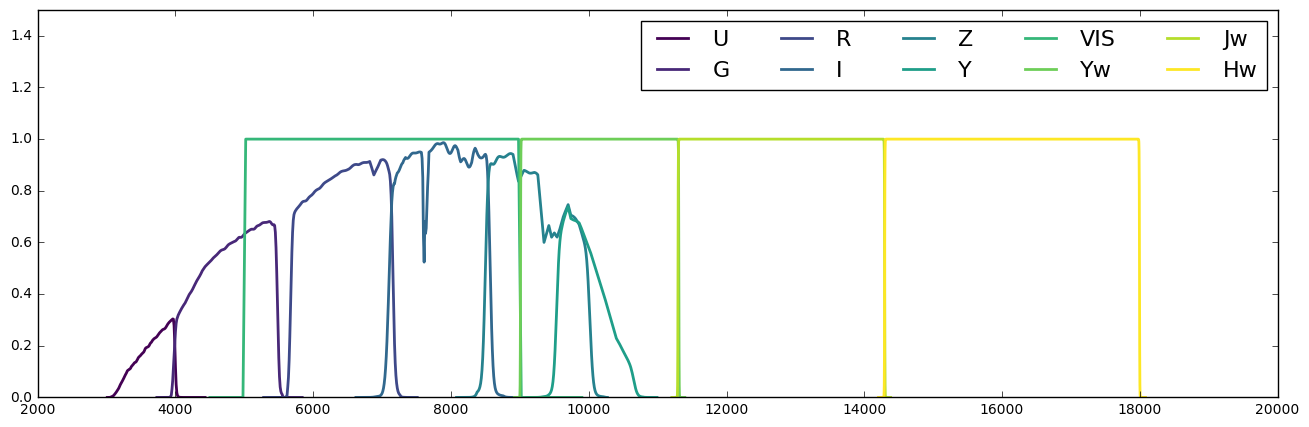

In [19]:
# initialize figure
plt.figure(figsize=(16, 5))

# define a sequence of colors
#colors = ['blue', 'magenta', 'red', 'orange', 'brown',  # this works because python implicitly
#          'green', 'teal', 'goldenrod', 'coral', 'black']  # continues bracketed statements

# define our colormap (see: https://matplotlib.org/examples/color/colormaps_reference.html)
color_scale = np.linspace(0, 1, Nfilt)
colors = plt.get_cmap('viridis')(color_scale) # 
for i in range(Nfilt):
    plt.plot(fw[i], ft[i], ls='-', lw=2, label=filt_names[i], color=colors[i])
plt.ylim([0, 1.5])
plt.legend(loc=1, ncol=5, fontsize=16)

What do you think is causing the different features in the $\lbrace U, G, R, I, Z, Y \rbrace$ transmission curves and the worse overall levels of transmission relative to the $\lbrace VIS, Y_w, J_w, H_w \rbrace$ curves? (Hint: it has something to do with one of the biggest differences between the LSST and *Euclid* surveys.)

Before moving on, let's take a second to examine how we've set up the for loop above in more detail above.
- The `range` argument initializes an **iterator** that goes from [0, `Nfilt`), where "[" signals *inclusive* (including zero) and ")" signals *exclusive* (up to but excluding `Nfilt`), respectively.
- We then step through the iterator using `i`, which takes on values 0, 1, 2, ... up to but excluding `Nfilt`.
- For each value of `i`, we plot the corresponding element of `fw`, `ft`, `filt_names`, and `colors`.

Another way to do this is to step through all these values simultaneously. Python allows you to do this using the `zip` method, which iterates over all zipped quantities simultaneously. Using the example below, see if you can rewrite the `for` loop above to loop over all quantities (`fw`, `ft`, `filt_names`, and `colors`) simultaneously. Feel free to also play around with this formatting to get more comfortable with how `zip` works.

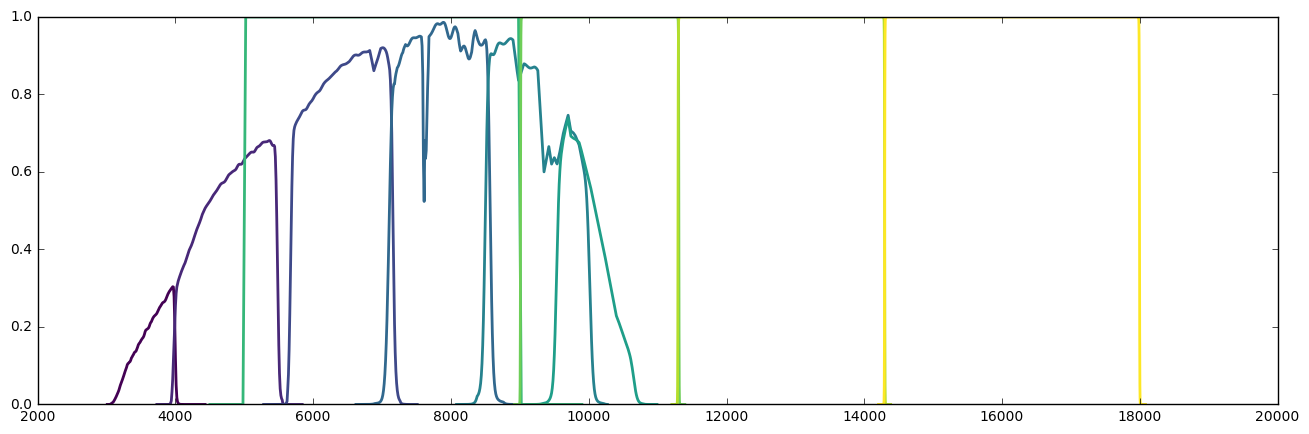

In [20]:
plt.figure(figsize=(16, 5))
for i, filt_x, filt_y in zip(range(Nfilt), fw, ft):
    plt.plot(filt_x, filt_y, ls='-', lw=2, label=filt_names[i], color=colors[i])

In addition, there's also no need for us to generate a counter using `range`. Python natively allows us to "count" within our loop using the `enumerate` function, which wraps whatever we're looping over. See if you can use the example below to re-write the `for` loop above.

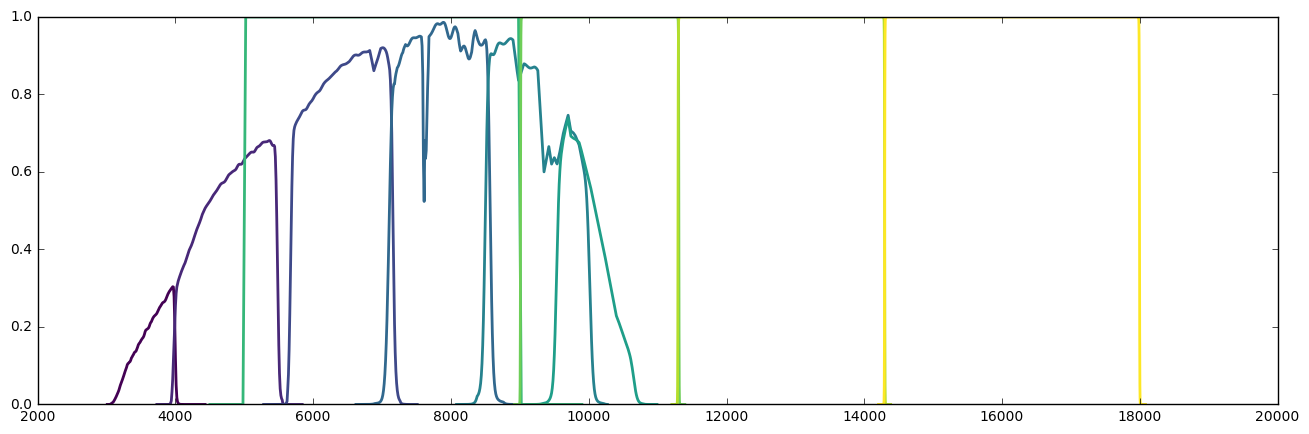

In [21]:
plt.figure(figsize=(16, 5))
for i, stuff in enumerate(zip(filt_names, colors)):
    plt.plot(fw[i], ft[i], ls='-', lw=2, label=stuff[0], color=stuff[1])

# Photometry

We now want to compute some basic properties of our set of filters. We'll start with the **effective wavelength**. This can be seen as the approximate "mean" wavelength of the filter, accounting for the differing transmission as a function of wavelength. Defining our wavelengths as $\lambda$, our frequencies as $\nu$, and our transmission at a particular frequency as $T_\nu$, the "standard" defition for this effective wavelength $\lambda_{\textrm{eff}}$:

$$ \lambda_{\textrm{eff}} = \exp \left[ \frac{\int T_\nu \, \ln \lambda \, d(\ln \nu)}{\int T_\nu \, d(\ln \nu)} \right] \quad . $$

Although this definition might seem a bit weird, the basic idea is we want to compromise between averaging as a function of wavelength compared to as a function of frequency, which don't give the same result since $ \lambda = c / \nu \propto \nu^{-1}$.

We can break down this computation into four steps:
1. compute the integral in the denominator,
2. compute the integral in the numerator,
3. exponentiate their ratio, and
4. iterate over all of our filters.

Python has a bunch of [numerical integration packages](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html) available as part of `scipy` for more general applications. There also is a basic numerical integration tool [`trapz`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html) as part of `numpy`, which should suffice for our purposes here. An example is shown below.

Integral = 5000.0


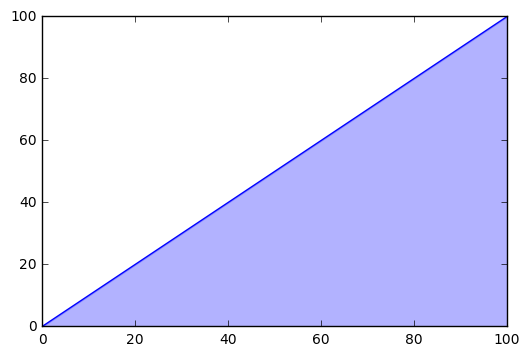

In [22]:
# integrate our function from the beginning of the notebook
plt.plot(x, y)  # plot our original function
plt.fill_between(x, y, color='blue', alpha=0.3)  # fill between y and 0 over our x's
y_area = np.trapz(y, x)  # numerically integrate our function

print('Integral = {0}'.format(y_area))

Using the example above, see if you can compute (1) the denominator, (2) numerator, and (3) effective wavelength for a particular filter in the style shown below. Then see if you can turn this into an array of effective wavelengths over all filters. I've included a one-statement solution below just so this isn't a "make it or break it" point, but try and come up with your own implementation for practice.

(Hint: Note that `numpy` has convenient array functions such as `np.log`.)

In [23]:
# denominator
denominator = np.trapz(T, ln(freq))

# numerator
numerator = np.trapz(T * ln(wave), ln(freq))

# effective wavelength (Schneider et al. 1983; Fukugita et al. 1996)
filt_cent = np.exp(numerator/denominator)

NameError: name 'T' is not defined

In [24]:
# array of effective wavelengths (compact solution)
filt_cent = np.array([np.exp(np.trapz(ft[i] * np.log(fw[i]), np.log(fnu[i])) / 
                             np.trapz(ft[i], np.log(fnu[i])))
                      for i in range(Nfilt)])

print(filt_cent)

[  3656.4639205    4762.23165652   6402.60268391   7809.28158254
   9162.10847057   9939.10386268   6708.23193988  10092.80550193
  12706.76925316  16038.210308  ]


** Extra Challenge: Code up a simple numerical integration scheme by hand.**

**Extra Extra Challenge: Use `scipy.integrate` to do the integral instead.**

In addition to the effective wavelength, we also want some basic metric of how "wide" our filter is. There a lot of ways to define this, just as there are a lot of ways to define an "effective" wavelength. Here, we will use the 95% interval where most of the transmission is contained. In other words, our "width" will be determined by the wavelengths where there's a total of 2.5% transmission remaining on the left/right edges. This is computed below.

In [25]:
# initializes a Nfilt x 2 array of "empty" values
filt_bounds = np.empty((Nfilt, 2))

# fraction of total flux from filter (confidence interval)
fbound = 0.95
for i in range(Nfilt):
    cdf = np.cumsum(ft[i])  # compute the cumulative sum over the transmission curve
    cdf /= cdf[-1]  # normalize the transmission curve to sum to 1.
    fremain = (1 - fbound) / 2.  # amount remaining (fraction) on either end
    
    # compute left bound
    temp = np.abs(cdf - fremain)  # absolute value
    idx_left = np.argmin(temp)  # find the **index** of the minimum position
    
    # compute right bound
    temp = np.abs(cdf - (1. - fremain))  # absolute value
    idx_right = np.argmin(temp)  # find the **index** of the minimum position
    
    # assign bounds to our 
    filt_bounds[i] = fw[i][idx_left], fw[i][idx_right]  # lower/upper bound [A]

# compute the "width" as the difference between the upper and lower 95% bounds
filt_width = filt_bounds[:,1] - filt_bounds[:,0] # filter width [A]

print(filt_width)

[  760.  1410.  1410.  1410.  1450.  1030.  3760.  2181.  2853.  3516.]


Spend some time breaking down the above snippet of code so that you can (ideally) explicitly summarize what exactly each line is doing and why. One way I like to make sense of unfamiliar code is by pulling it apart and plotting some of the intermediate results. An example of this is shown below.

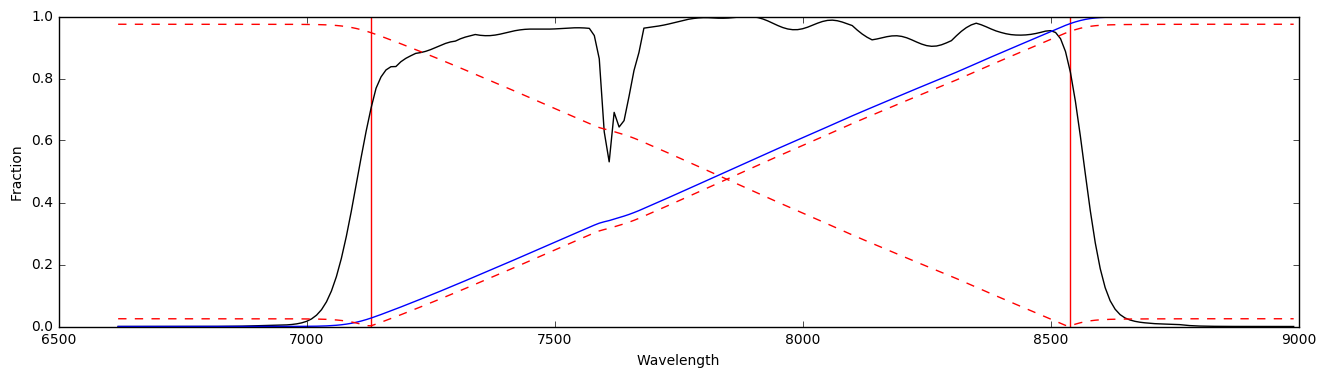

In [26]:
i = 3
cdf = np.cumsum(ft[i])
cdf /= cdf[-1]
fremain = (1 - fbound) / 2.

plt.figure(figsize=(16, 4))
plt.plot(fw[i], ft[i] / max(ft[i]), color='black')  # normalize to 1.
plt.plot(fw[i], cdf, color='blue')  # normalize to 1.

temp = np.abs(cdf - fremain)
idx_left = np.argmin(temp)
plt.plot(fw[i], temp, color='red', linestyle='--')  # function we will minimize
plt.vlines(fw[i][idx_left], 0., 1., color='red')

temp = np.abs(cdf - (1. - fremain))
idx_right = np.argmin(temp)
plt.plot(fw[i], temp, color='red', linestyle='--')  # function we will minimize
plt.vlines(fw[i][idx_right], 0., 1., color='red')

plt.xlabel('Wavelength')
plt.ylabel('Fraction')

If this type of thing works for you, great! If not, definitely try and find out what general practices/strategies are effective for you since you'll probably be doing a lot of this as you become more involved in coding.

Using this information, we can now compute the average **photon energy** within each filter (i.e. the minimum unit/quantum of energy). One of the seminal findings of quantum mechanics (and the thing that got Einstein the nobel prize) was that photon energy is *quantized* according to the relation

$$ E = h \nu = h c / \lambda  \quad . $$

Let's use this relation to compute the (average) energy of an individual photon in each of our filters.

In [27]:
c = 2.998e18  # speed of light [A/s]
h = 6.6260755e-27  # Planck constant in erg*s
ephot_cent = h * c / filt_cent # photon energies at effective wavelength [erg]
print(ephot_cent)

[  5.43283751e-12   4.17135826e-12   3.10264049e-12   2.54376464e-12
   2.16816625e-12   1.99866855e-12   2.96128317e-12   1.96823117e-12
   1.56333793e-12   1.23860293e-12]


Now that we have all these bits and pieces, see if you can plot the average photon energy in each filter as a function of wavelength. A short example is shown below using `plt.errorbar` along with a short printout summary that utilizes the `round` function, but you're welcome to be as creative as you like!

Filter Center[A] Width(0.95)[A] Low[A] High[A] E_phot[1e-12 erg]
U 3656.5 760.0 3220.0 3980.0 5.43
G 4762.2 1410.0 4040.0 5450.0 4.17
R 6402.6 1410.0 5710.0 7120.0 3.1
I 7809.3 1410.0 7130.0 8540.0 2.54
Z 9162.1 1450.0 8520.0 9970.0 2.17
Y 9939.1 1030.0 9530.0 10560.0 2.0
VIS 6708.2 3760.0 5100.0 8860.0 2.96
Yw 10092.8 2181.0 9066.0 11247.0 1.97
Jw 12706.8 2853.0 11367.0 14220.0 1.56
Hw 16038.2 3516.0 14385.0 17901.0 1.24


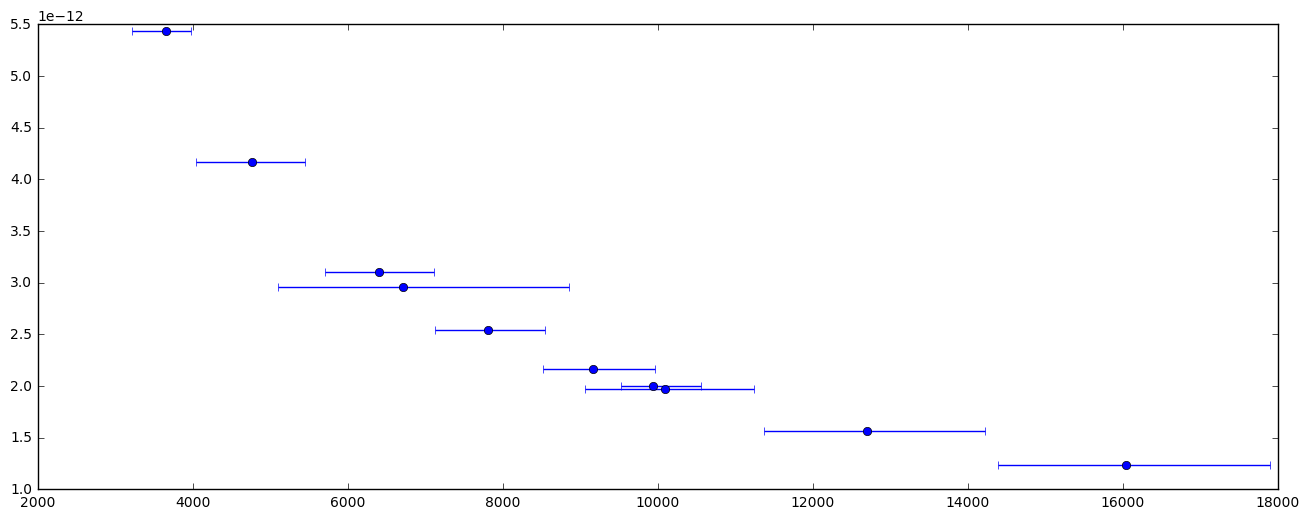

In [33]:
# figure
plt.figure(figsize=(16, 6))
xlow, xhigh = filt_bounds.T
xe_low, xe_high = filt_cent - xlow, xhigh - filt_cent
plt.errorbar(filt_cent, ephot_cent, xerr=[xe_low, xe_high], linestyle='none', marker='o')

# printout
print('Filter', 'Center[A]', 'Width({0})[A]'.format(fbound), 'Low[A]', 'High[A]', 'E_phot[1e-12 erg]')
for i in xrange(Nfilt):
    print(filt_names[i], round(filt_cent[i], 1), filt_width[i], filt_bounds[i][0], 
          filt_bounds[i][1], round(ephot_cent[i] * 1e12, 2))

**Extra Challenge: Can you get the axes of the plot to be (semi-)logarithmic rather than linear?**

# Observing a Galaxy

We are now ready to simulate a basic observation of our original galaxy through our set of filters. First, we need to integrate our galaxy spectrum $S_\nu$ over each filter. This takes a similar form to our calculation of the effective wavelength:

$$ F_\nu = \frac{\int T_\nu \, S_\nu \, d(\ln \nu)}{\int T_\nu \, d(\ln \nu)} $$

where $S_\nu$ (flux density per *frequency*) and $S_\lambda$ (flux density per *wavelength*) are related via

$$ S_\nu = S_\lambda \frac{\lambda^2}{c}  $$ 

using the nifty result

$$ d\nu = d \left(\frac{c}{\lambda}\right) = - \frac{c}{\lambda^2} d\lambda \quad . $$

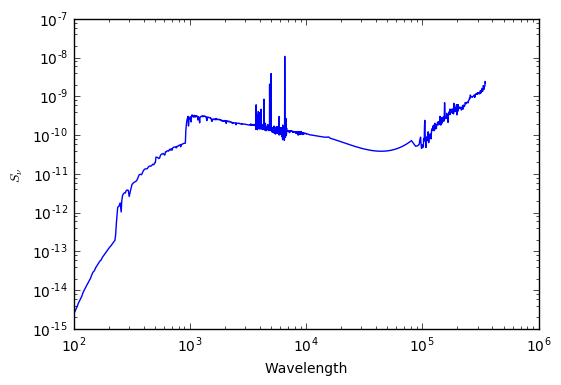

In [34]:
# compute S_\nu
fgal_nu = fgal_wave * wave**2 / c  # this works because units are [A] and [A/s]

# plot our result
plt.loglog(wave, fgal_nu)
plt.xlabel('Wavelength')
plt.ylabel(r'$S_\nu$')  # LaTeX-style math; the preceding 'r' "protects" the string

Why this conversion between $S_\nu$ and $S_\lambda$? A mix between historical reasons and plotting usefulness (sometimes it's easier to visualize trends as per unit wavelength instead of per unit frequency, and vice versa). Plotting things in $S_\nu$ tends to highlight behavior in the optical range (which becomes "flatter" the more star formation a galaxy tends to have).

Using everything we've covered up to this point, we're now ready to simulate our galaxy observation. First, let's integrate our galaxy over the filters to get the relative photometric flux density $F_\nu$.

In [35]:
freq = c / wave
phot = np.array([np.trapz(ft[i] * fgal_nu, np.log(freq)) / 
                 np.trapz(ft[i], np.log(freq))
                 for i in range(Nfilt)])

ValueError: operands could not be broadcast together with shapes (143,) (2345,) 

Oh no -- it seems we've hit an error! It turns out our galaxy is observed at a different number of wavelengths compared to our original filter. To integrate numerically, we need both our filter and the galaxy spectrum to be observed at the exact same wavelength values. This requires us to **interpolate** one of our values. Since the galaxy wavelength grid appears to be more precise, let's go with interpolating all of our filter results onto a galaxy grid.

Interpolation in Python is super easy using functions like `np.interp`. See if you can interpolate the transmission from filter onto the wavelength grid spanned by our galaxy (`wave`), under the condition that values outside the boundaries of the filter are automatically set to zero. An incomplete solution is given below.

In [36]:
# interpolation (incomplete)
np.interp(wave, fw[i], ft[i])

array([  2.63476862e-07,   2.63476862e-07,   2.63476862e-07, ...,
         4.77424925e-06,   4.77424925e-06,   4.77424925e-06])

Using this, let's redo our integral from above. I've provided a one-statement solution below, but I would highly encourage everyone to try their hand at implementing something themselves.

In [37]:
# compute relative photometry
phot = np.array([np.trapz(np.interp(wave, fw[i], ft[i], left=0., right=0.) * fgal_nu, np.log(freq)) / 
                 np.trapz(np.interp(wave, fw[i], ft[i], left=0., right=0.), np.log(freq))
                 for i in range(Nfilt)])

print(phot)

[  1.95845909e-10   2.03747499e-10   2.01147849e-10   1.22792303e-10
   1.14212479e-10   1.10239520e-10   1.62893295e-10   1.07909066e-10
   9.43936737e-11   8.40782399e-11]


Note that this result is unnormalized because we haven't compared this *relative* result to some standard value. To correct for this and make the final answer more realistic, we're just going to multiply this result by $10^{-23}$.

In [38]:
phot *= 1e-23

Now we want to derive error bars on our photometry. Let's pretend for a (beautiful) second that there is no other source of noise other than the source itself (i.e. ignoring the sky, instrument, etc., and only counting the number of photons received from our observed galaxy). The uncertainty on our photometry is directly related to the uncertainty in the number of photons we expect to receive. This is an example of a [Poisson process](https://en.wikipedia.org/wiki/Poisson_point_process), and it turns out the standard deviation in the number of photons we receive is just

$$ \sigma_N = \sqrt{N} ~\Rightarrow~ \sigma_N / N = 1/\sqrt{N} \quad . $$

So our fractional uncertainty is just $1/\sqrt{N}$.

**Using the photon energies we computed earlier, compute the fractional uncertainties we expect in each filter assuming a 4hr observation with a 8m telescope at the effective wavelength of each filter.** Remember that our photometric flux densities have units of erg/s/cm$^2$/Hz. Again, I've added in a one-statement solution so you can continue on, but please try and write your own code to compute this.

In [39]:
phot_ferr = np.empty(Nfilt)

In [40]:
phot_ferr = 1. / np.sqrt(phot * (c / filt_cent) * (8. * 100. * 100.) * (4. * 60. * 60.) / ephot_cent)
print(phot_ferr)

[ 0.05419319  0.05313196  0.05347419  0.06844101  0.07096516  0.07223261
  0.05942242  0.07300843  0.07806035  0.0827104 ]


Finally, let's plot everything together: the galaxy SED, the expected photometry, and the observed filter set. A bare-bones example is shown below, where I've input lots of values by hand using trial and error.

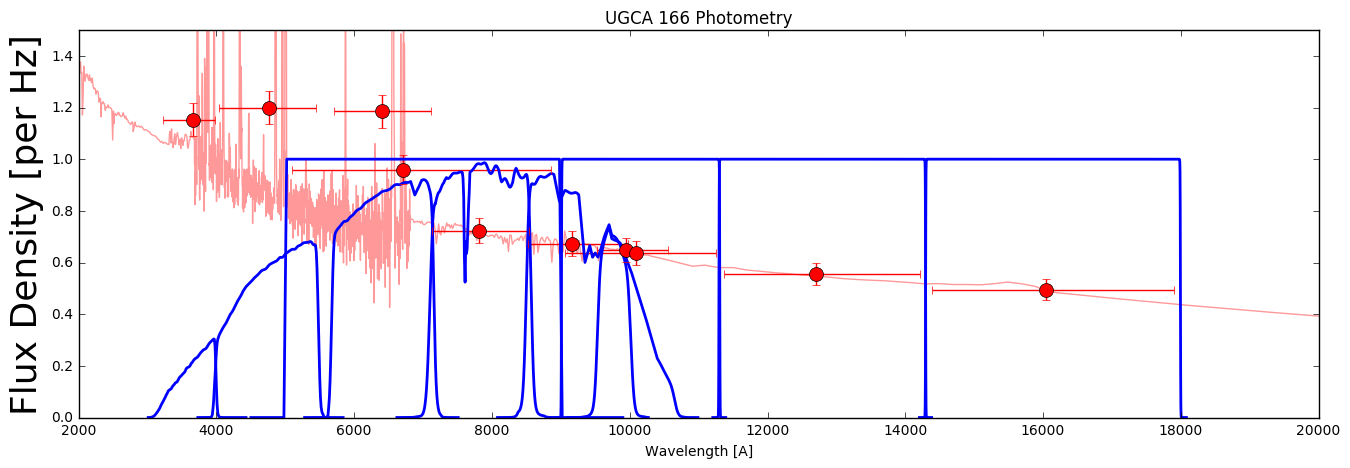

In [41]:
# plot our results
plt.figure(figsize=(16, 5))
plt.plot(wave, fgal_nu / np.median(fgal_nu) * 0.8, color='red', alpha=0.4)
for i in range(Nfilt):
    plt.plot(fw[i], ft[i], ls='-', lw=2, color='blue')
plt.xlim([2e3, 2e4])
plt.ylim([0, 1.5])
plt.errorbar(filt_cent, phot / max(phot) * 1.2, xerr=[xe_low, xe_high],
             yerr = phot * phot_ferr / max(phot) * 1.2,
             marker='o', markersize=10, linestyle='none', color='red')
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux Density [per Hz]', fontsize=26)
plt.title('UGCA 166 Photometry')

**Extra Challenge: Can you add in some Gaussian (i.e. Normal) white noise to the observation to better mimic an observed *realization* of our galaxy?**

**Extra Challenge: Assume that random sky noise creates 2 photons per hour per (projected) m$^2$. How does this change the noise calculations above?**

**Extra Extra Challenge: Our noise assumptions above assume that we can approximate a discrete counting process (Poisson) using a continuous function (Normal). This can lead to problems since we only observe a discrete number of photons and we can't observe negative photons. Simulate the actual expected photon counts from a Poisson distribution.**

And that's that!